# QC SIG: quantum gates

Quantum gates are the building blocks of quantum circuits. They operate on quantum bits, or qubits, altering their  state. Here are some unique properties of quantum gates as compared to classical logical gates:

- Logical Reversibility: Quantum gates can be represented mathematically by unitary matrices. So, their operation can always be undone by applying certain inverse gates. Note: the majority of classical gates are logical irreversible. 


- Superposition: Qubits can exist in a superposition of states, which means that they can represent multiple values at once. Quantum gates can operate on these superposed states to perform multiple computations simultaneously.


- Entanglement: Two or more qubits can become entangled, meaning that their states are correlated and dependent on each other. Quantum gates can manipulate these entangled states to perform operations that are not possible in classical computing.


In this notebook, we will use `Qiskit` and play with some simple quantum gates, showing how they can be used to manipulate the state of qubits. The information encoded by subjecting qubits to an ordered sequence of quantum gates (quantum circuit) can then be "translated" via measurements into classical bitstring information. 


## Contents
* [Example I: Application of the Hadamard gate](#first-bullet)
* [Example II: Application of the CNOT gate](#second-bullet)
* [Example III: Creating a Bell state](#third-bullet)
* [Applications: Superdense coding and quantum teleportation](#fourth-bullet)

Let's first import Qiskit:

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex

from qiskit.extensions import Initialize
from qiskit.result import marginal_counts
from qiskit.quantum_info import random_statevector

import numpy as np
from math import pi, sqrt
import matplotlib.pyplot

Now, let's define at the outset our QC simulator:

In [2]:
simulator = Aer.get_backend('aer_simulator')

## Example I: Application of the Hadamard gate <a class="anchor" id="first-bullet"></a>

Consider a qubit $|q_{0}\rangle$ which can be written as a linear combination of $|0\rangle$ and $|1\rangle$:

$|q_{0}\rangle = (1 \times |0\rangle) + (0 \times |1\rangle) \equiv |0\rangle$

or, in matrix notation, 

$|q_{0}\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$. 

In the following, we will show that the application of the Hadamard gate on $|q_{0}\rangle$, i.e., 

$H |q_{0}\rangle = \frac{\sqrt{2}}{2} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac{\sqrt{2}}{2}\begin{pmatrix} 1 \\ 1 \end{pmatrix} \equiv  \frac{\sqrt{2}}{2} (|0\rangle+|1\rangle)$, 

enables us to create a final state which is a superposition of the $|0\rangle$ and $|1\rangle$ states.

Circuit:


┌───┐ statevector ┌─┐
  q: ┤ H ├──────░──────┤M├
     └───┘      ░      └╥┘
c: 1/═══════════════════╩═
                        0

<IPython.core.display.Latex object>

Measurement results:


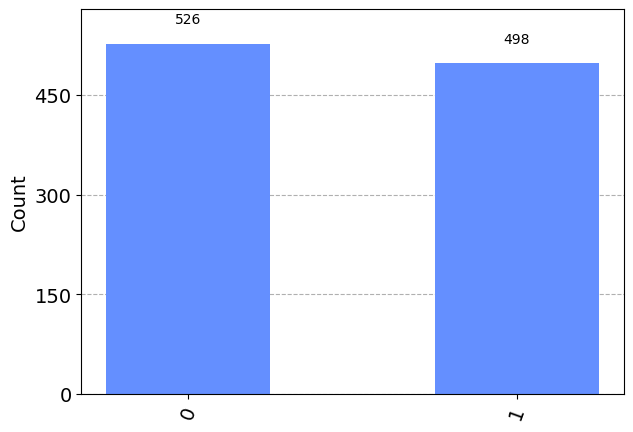

In [3]:
# Generate a quantum circuit with one quantum and one classical bit
qcirc = QuantumCircuit(1,1) # By default, the initial state of qubit |q_0> is set to |0>

# Now apply a quantum gate to |q_0>

#qcirc.x(0) # to apply the Pauli-X (NOT) gate to qubit 0
#qcirc.y(0) # to apply the Pauli-Y gate to qubit 0 
#qcirc.z(0) # to apply the Pauli-Z gate to qubit 0

qcirc.h(0) # to apply the Hadamard or H gate to |q_0>

# Save the vector
qcirc.save_statevector()

# Add a measurement on the qubit
qcirc.measure(0,0)

# Display the circuit
print("Circuit:")
display(qcirc.draw())

# Execute circuit using the QC simulator and get the measurement results
qobj = assemble(qcirc)
result = simulator.run(qobj).result()
counts = result.get_counts()

# Display the state of |q_0> after running the circuit
out_state = result.get_statevector()
display(array_to_latex(out_state, prefix="\\text{Final statevector} = "))

# Plot the final "classical" output after measurement
print("Measurement results:")
plot_histogram(counts)

## Example II: Application of the CNOT gate <a class="anchor" id="second-bullet"></a>

Now consider the case of a two qubit system. 

Our inital state is defined by: 

$|q_{0}q_{1}\rangle = (0 \times |00\rangle) + (0 \times |01\rangle) + (1 \times |10\rangle) + (0 \times |11\rangle) \equiv |10\rangle$ 

or, in matrix notation, 

$|q_{0}q_{1}\rangle = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}$. 

We will apply the CNOT operator and show that the final state vector is given by:

$ \mathrm{CNOT} |q_{0}q_{1}\rangle = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{pmatrix} \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix} \equiv  |11\rangle $ 


Circuit:


┌───┐      statevector ┌─┐   
q_0: ┤ X ├──■────────░──────┤M├───
     └───┘┌─┴─┐      ░      └╥┘┌─┐
q_1: ─────┤ X ├──────░───────╫─┤M├
          └───┘      ░       ║ └╥┘
c: 2/════════════════════════╩══╩═
                             0  1

<IPython.core.display.Latex object>

Measurement results:


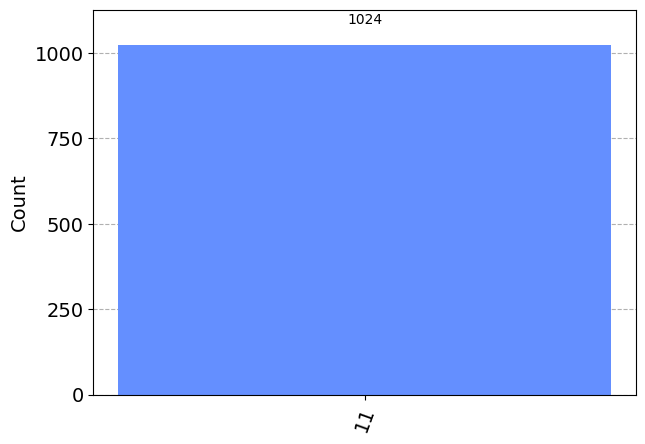

In [4]:
# Generating a quantum circuit with two quantum and two classical bits
qcirc = QuantumCircuit(2,2)

# Set the initial state of qubit |q_0> to |1> by appling the Pauli-X (NOT) gate
qcirc.x(0)

# if you want to initialize the state of |q_1> to also |1>, uncomment the line below.
#qcirc.x(1)

# Apply a cnot taking |q_0> as control and |q_1> as target
qcirc.cx(0,1)

# Save the vector
qcirc.save_statevector()

# Add a measurement on both qubits
qcirc.measure(0,0)
qcirc.measure(1,1)

# Display the circuit
print("Circuit:")
display(qcirc.draw())

# Execute circuit using the QC simulator and get the measurement results
qobj = assemble(qcirc)
result = simulator.run(qobj).result()
counts = result.get_counts()

# Display the state of |q_0> and |q_1> after running the circuit
out_state = result.get_statevector()
display(array_to_latex(out_state, prefix="\\text{Final statevector} = "))

# Plot the final "classical" outputs after measurement
print("Measurement results:")
plot_histogram(counts)

## Example III: Creating a Bell state <a class="anchor" id="third-bullet"></a>

In this last example, we address a very important aspect of quantum computing: the existence of entangled states. 

As an example, we will generate a Bell state, i.e., 

$\frac{\sqrt{2}}{2} (|00\rangle+|11\rangle)$, 

from two qubits initially at the $|00\rangle$ state using the Hadamard (H) and CNOT gates.

Circuit:


┌───┐      statevector ┌─┐   
q_0: ┤ H ├──■────────░──────┤M├───
     └───┘┌─┴─┐      ░      └╥┘┌─┐
q_1: ─────┤ X ├──────░───────╫─┤M├
          └───┘      ░       ║ └╥┘
c: 2/════════════════════════╩══╩═
                             0  1

<IPython.core.display.Latex object>

Measurement results:


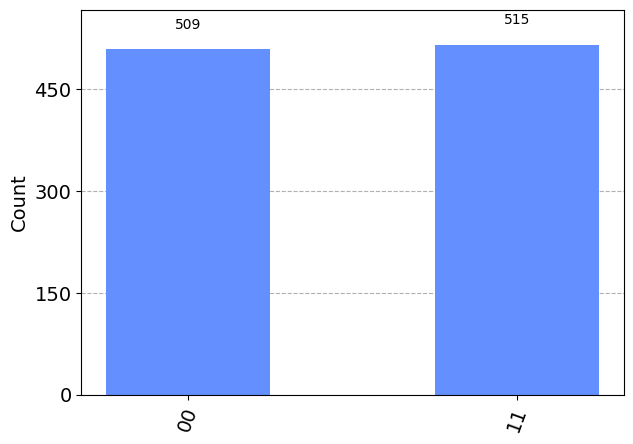

In [5]:
# Create again a quantum circuit with two quantum and two classical bits
# Recall that, by default, the initial state of qubits |q_0> and |q_1> are set to |0>
qcirc = QuantumCircuit(2,2)

# Apply the Hadamard operator on qubit |q_0>
qcirc.h(0)

# Now, apply a cnot taking |q_0> as control and |q_1> as target
qcirc.cx(0,1)

# Save the vector
qcirc.save_statevector()

# Add a measurement on each qubits
qcirc.measure(0,0)
qcirc.measure(1,1)

# Display the circuit
print("Circuit:")
display(qcirc.draw())

# Execute circuit using the QC simulator and get the measurement results
qobj = assemble(qcirc)
result = simulator.run(qobj).result()
counts = result.get_counts()

# Display the state of |q_0> and |q_1> after running the circuit
out_state = result.get_statevector()
display(array_to_latex(out_state, prefix="\\text{Final statevector} = "))

# Plot the final "classical" outputs after measurement
print("Measurement results:")
plot_histogram(counts)

## Applications: Superdense coding and quantum teleportation <a class="anchor" id="fourth-bullet"></a>

Quantum teleportation and superdense coding are closely related, to avoid confusion we need to clarify the difference.

- Quantum teleportation is a process by which the state of a qubit (say, $|\psi\rangle$) can be transmitted from one location to another, using two bits of classical communication and a Bell pair. In other words, we can say it is a protocol that destroys the quantum state of a qubit in one location and recreates it on a qubit at a distant location, with the help of shared entanglement.

- Superdense coding is a procedure that allows someone to send two classical bits to another party using just a single qubit of communication.

| Teleportation | Superdense Coding |
| :-: | :-: |
| Transmit one qubit using two classical bits | Transmit two classical bits using one qubit |

### I. Superdense Coding

<div style="text-align:center">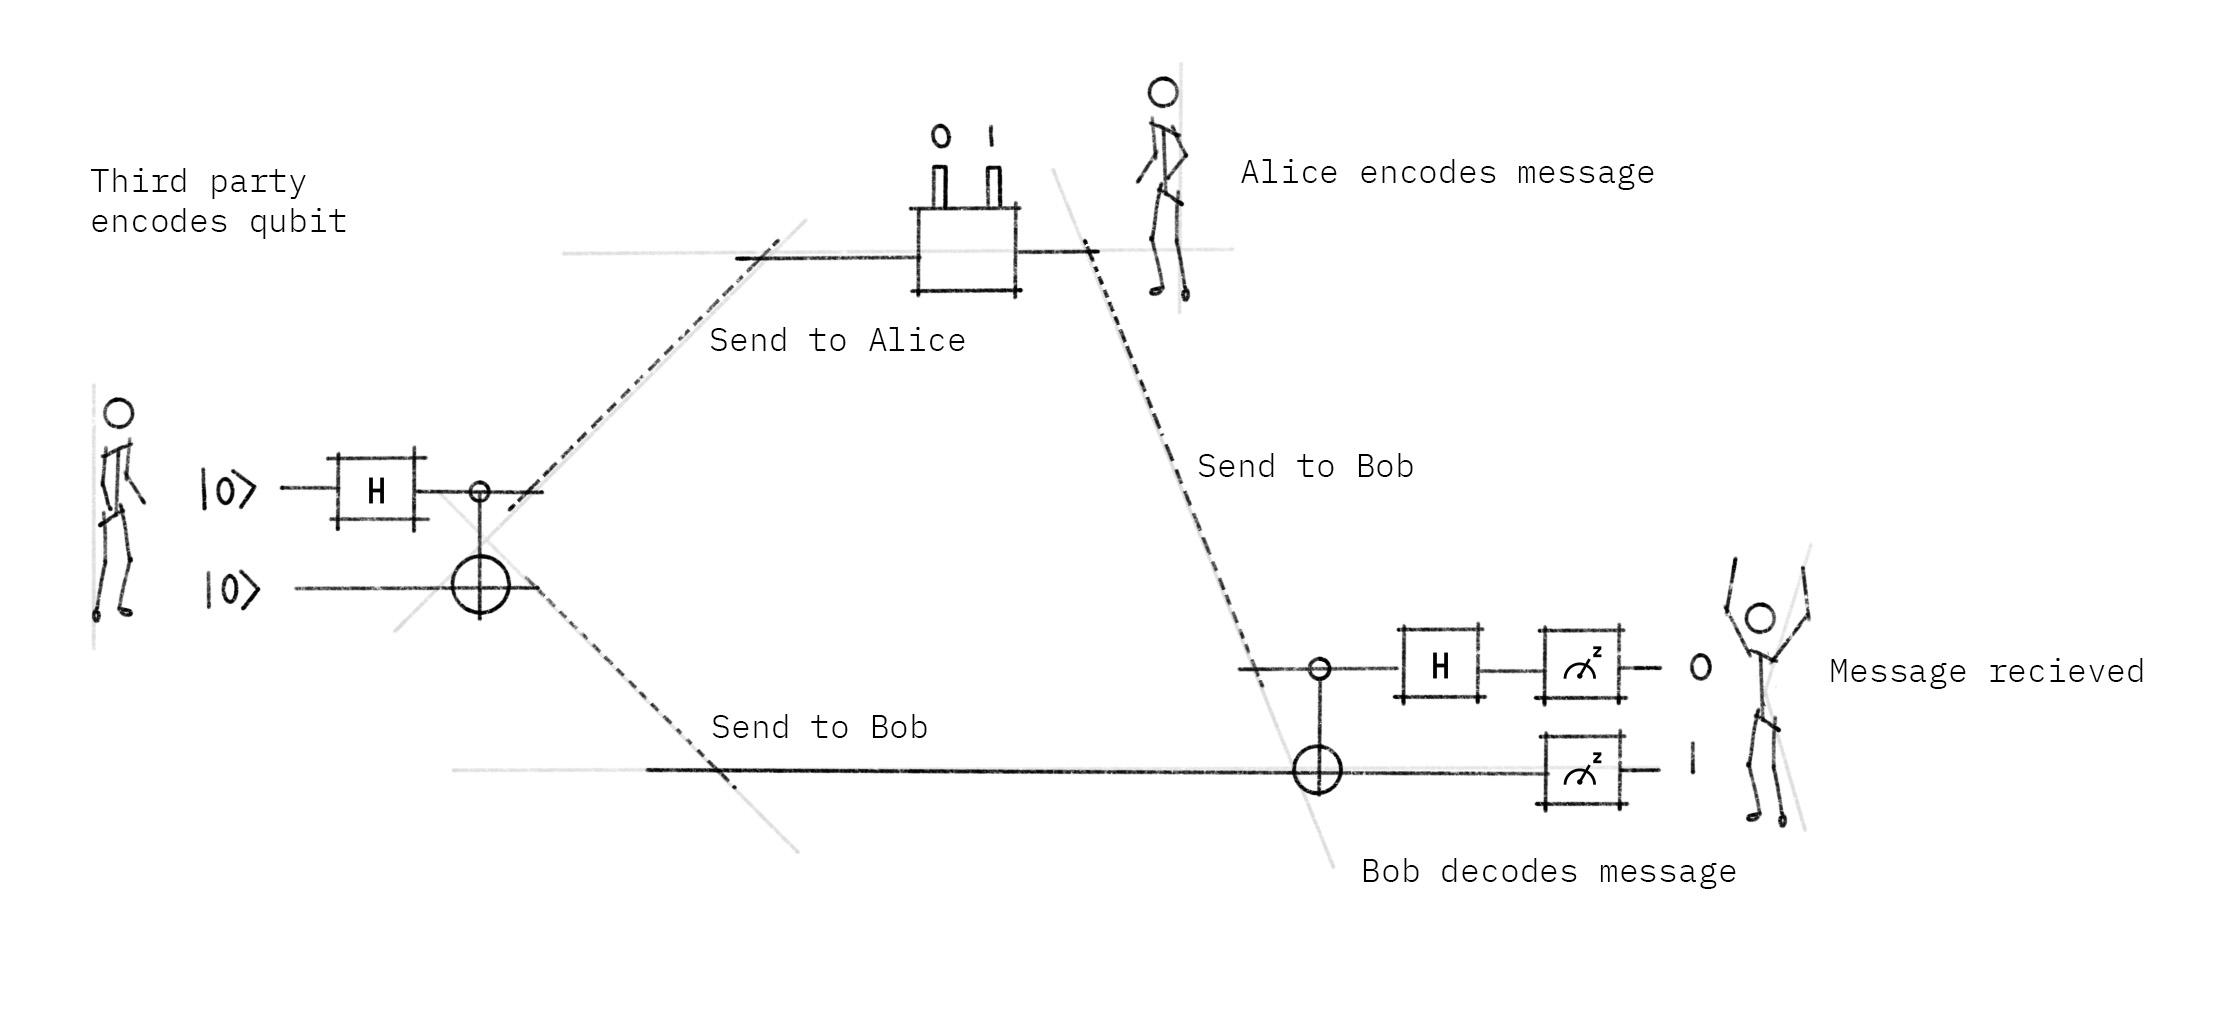</div>

Circuit:


┌───┐      ░ ┌───┐┌───┐ ░      ┌───┐ statevector  ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤ X ├┤ Z ├─░───■──┤ H ├──────░───────░─┤M├───
        └───┘┌─┴─┐ ░ └───┘└───┘ ░ ┌─┴─┐└───┘      ░       ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░────────────░─┤ X ├───────────░───────░──╫─┤M├
             └───┘ ░            ░ └───┘           ░       ░  ║ └╥┘
meas: 2/═════════════════════════════════════════════════════╩══╩═
                                                             0  1

<IPython.core.display.Latex object>

Measurement results:


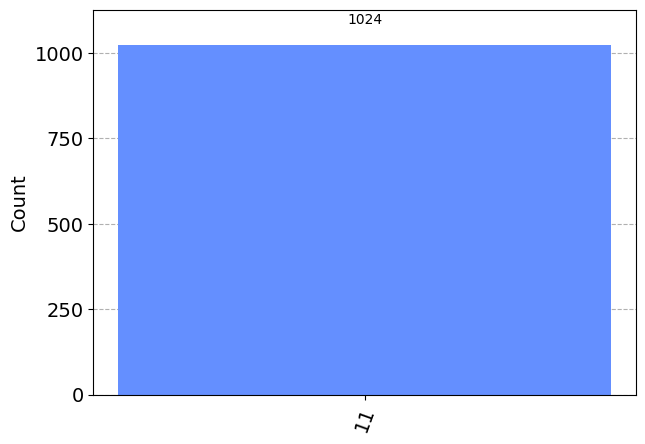

In [6]:
def charlie_create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    qc.h(a)     # Put qubit a into state |+>
    qc.cx(a, b) # CNOT with a as control and b as target


def alice_encode_message(qc, qubit, msg):
    """Encodes a two-bit message on qc using the superdense coding protocol
    Args:
        qc (QuantumCircuit): Circuit to encode message on
        qubit (int): Which qubit to add the gate to
        msg (str): Two-bit message to send
    Returns:
        QuantumCircuit: Circuit that, when decoded, will produce msg
    Raises:
        ValueError if msg is wrong length or contains invalid characters
    """
    if len(msg) != 2 or not set(msg).issubset({"0","1"}):
        raise ValueError(f"message '{msg}' is invalid")
    if msg[1] == "1":
        qc.x(qubit)
    if msg[0] == "1":
        qc.z(qubit)
    return qc


def bob_decode_message(qc, a, b):
    """Applies CNOT and X gates on Bob's final two qubits."""
    qc.cx(a, b)
    qc.h(a)


# creating a quantum circuit with 2 qubits     
qcirc = QuantumCircuit(2)

# Charlie creates the entangled pair between Alice and Bob
charlie_create_bell_pair(qcirc, 0, 1)
qcirc.barrier() # use barrier to separate steps

# At this point, qubit |q_0> goes to Alice and qubit |q_1> goes to Bob

# Next, Alice encodes her message onto qubit |q_0>. In this case,
# we want to send the message '10'. You can try changing this
# value and see how it affects the circuit
message = '11'
alice_encode_message(qcirc, 0, message)
qcirc.barrier()

# Alice then sends her qubit to Bob.

# After receiving qubit |q_0>, Bob applies the recovery protocol:
bob_decode_message(qcirc, 0, 1)

# Save the final vector
qcirc.save_statevector()

# Finally, Bob measures his qubits to read Alice's message
qcirc.measure_all()

# Display the circuit
print("Circuit:")
display(qcirc.draw())

# Execute circuit using the QC simulator and get the measurement results
qobj = assemble(qcirc)
result = simulator.run(qobj).result()
counts = result.get_counts()

out_state = result.get_statevector()
display(array_to_latex(out_state, prefix="\\text{Final statevector} = "))

# Plot the final "classical" outputs after measurement
print("Measurement results:")
plot_histogram(counts)

### II. Quantum teleportation

<div style="text-align:center">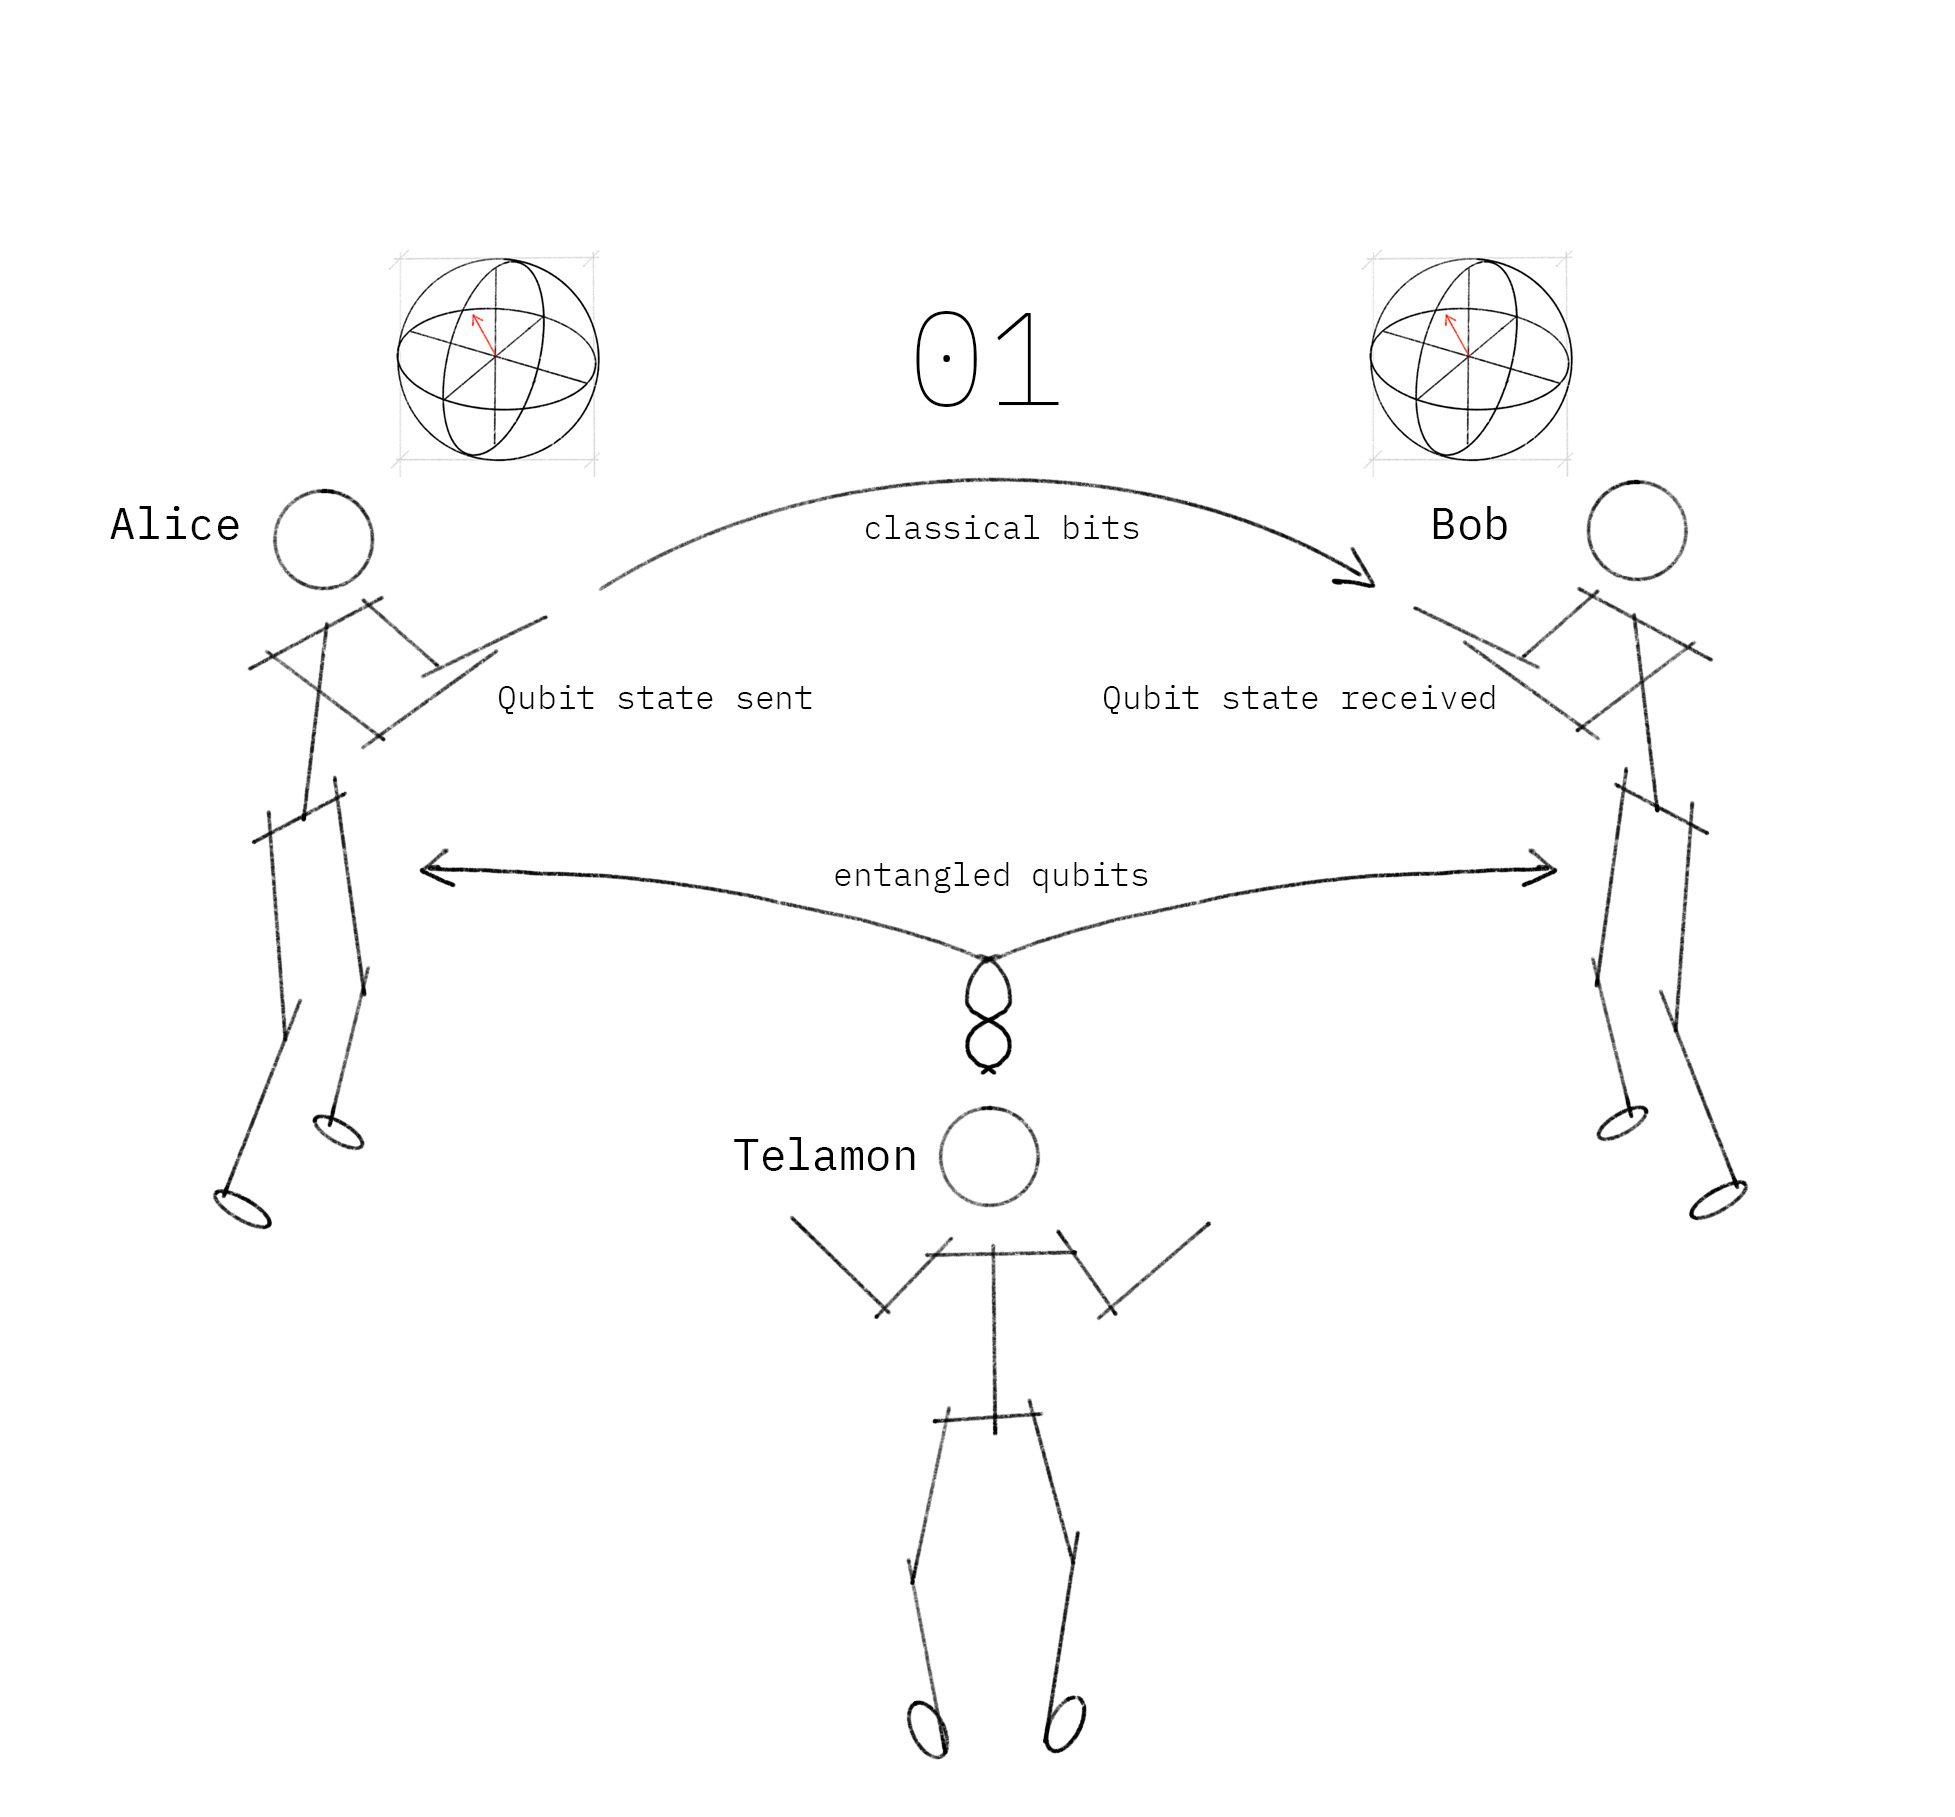</div>


Circuit:


┌─────────────────────────────┐ ░            ░      ┌───┐ ░ ┌─┐    ░ »
  q_0: ┤ Initialize(0.70711,0.70711) ├─░────────────░───■──┤ H ├─░─┤M├────░─»
       └─────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░ »
  q_1: ────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░─»
                                       ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ »
  q_2: ────────────────────────────────░──────┤ X ├─░────────────░──╫──╫──░─»
                                       ░      └───┘ ░            ░  ║  ║  ░ »
crz: 1/═════════════════════════════════════════════════════════════╩══╬════»
                                                                    0  ║    »
crx: 1/════════════════════════════════════════════════════════════════╩════»
                                                                       0    »
«                      statevector 
«  q_0: ────────────────────░──────
«                           ░      
«  q_1: ────────────────────░──────
«        ┌───┐  ┌───┐       ░      
«  q_2: ─┤ X ├──┤ Z ├───────░──────
«        └─╥─┘  └─╥─┘       ░      
«          ║   ┌──╨──┐             
«crz: 1/═══╬═══╡ 0x1 ╞═════════════
«       ┌──╨──┐└─────┘             
«crx: 1/╡ 0x1 ╞════════════════════
«       └─────┘

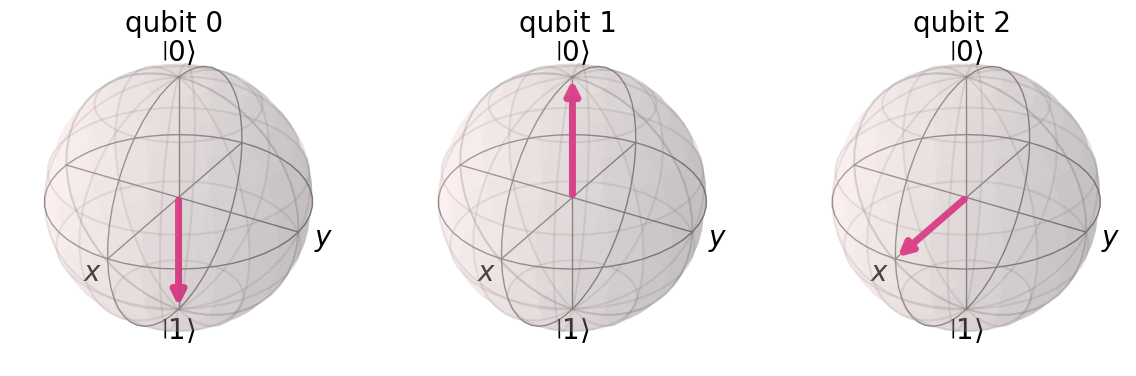

In [7]:
def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    qc.h(a)     # Put qubit a into state |+>
    qc.cx(a, b) # CNOT with a as control and b as target


def alice_gates(qc, psi, a):
    """Applies CNOT and X gates on Alices' two qubits."""
    qc.cx(psi, a)
    qc.h(psi)


def alice_measure_and_send(qc, a, b, ca, cb):
    """Measures qubits a & b, store results in ca & cb, and 'send' them to Bob."""
    qc.measure(a, ca)
    qc.measure(b, cb)


def bob_gates(qc, qubit, crz, crx):
    """Decodes classical bits and apply gate operations on a qubit accordingly"""
    qc.x(qubit).c_if(crx, 1) # Apply X and/or Z gates to qubit if the 
    qc.z(qubit).c_if(crz, 1) # classical registers are '1'


## SETUP
# let's create our quantum circuit with 3 qubits and 2 classical bits

qr = QuantumRegister(3, name="q")      # sets up 3 qubits in one quantum register
crz = ClassicalRegister(1, name="crz") # and 2 classical bits
crx = ClassicalRegister(1, name="crx") # in 2 different classical registers

qcirc = QuantumCircuit(qr, crz, crx)

## STEP 0
# First, let's initialize Alice's |q_0> (|psi>) in a state of choice
initial_state = [1/sqrt(2), 1/sqrt(2)]
qcirc.initialize(initial_state, 0)
qcirc.barrier() # use barrier to separate steps

## STEP 1 
# Now begins the teleportation protocol
# First entangle qubits |q_1> and |q_2> 
create_bell_pair(qcirc, 1, 2)
qcirc.barrier()

## STEP 2
# Send |q_1> to Alice and |q_2> to Bob
alice_gates(qcirc, 0, 1)
qcirc.barrier()

## STEP 3
# Alice then measures her 2 qubits and 
# sends the results via 2 classical bits to Bob
alice_measure_and_send(qcirc, 0, 1, crz, crx)
qcirc.barrier()

## STEP 4
# Bob decodes Alice's info and 
# performs operations on its qubit accordingly
bob_gates(qcirc, 2, crz, crx)

# Save the final vector
qcirc.save_statevector()

# Display the circuit
print("Circuit:")
display(qcirc.draw())

# Execute circuit using the QC simulator and get the measurement results
qobj = assemble(qcirc)
result = simulator.run(qobj).result()
counts = result.get_counts()

out_state = result.get_statevector()

# Use Bloch spheres to plot and check results
plot_bloch_multivector(out_state)